## ***Binary Classification with Bank Churn Dataset - Kaggle Playground S04E01***
### ***Objective***: To predict whether a customer will continue with the account or close it (e.g.churn)

----
## ***Table of content***
----

## Placeholder

## ***1. Importing libraries***

In [1]:
# import libraries
# libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data preprocessing & prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## ***2. Reading data & overview of the data***

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Now we start basic exploration of the dataset. My general approach for tabular data would be as follow:
- Dataset shapes
- List of features & target
- Check for data types
- Check & deal with missing values
- Basic Statistical summary (both categorical & numberical values)
- Distribution of features & target
- Correlation analysis
- Features interactions
- Outlier detection
- Hypothesis Generation. From this, we decide on further data manipulation such as encoding, feature engineering

This process is iterative, most like trial & error with ultimate goal is forming a hypothesis for effective feature engineering. So please bear with me.

### 2.1 Basic shapes of dataset

In [3]:
# Data shape
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (165034, 14)
Test shape: (110023, 13)


In [4]:
# First 05 rows of train dataset
from IPython.display import display
display(train.head())

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# First 05 rows of the test dataset
display(test.head())

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
# List of features in the dataset
print('Features:', train.columns)

Features: Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### 2.2 Data types of features & target

In [7]:
# Data types of the features
print('Data types:', train.dtypes)

Data types: id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [8]:
# Summary of the dataset
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
train_null = train.isnull().sum()
test_null = test.isnull().sum()
print('Train Null:\n', train_null)
print('Test Null:\n', test_null)

Train Null:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Test Null:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [10]:
def classify_features_with_unique(df, categorical_threshold=20):
    feature_types = []
    unique_values = []
    
    for column in df.columns:
        if df[column].dtype == 'object':
            feature_type = 'text'
            unique = ', '.join(df[column].unique())
        elif df[column].nunique() <= categorical_threshold:
            feature_type = 'categorical'
            unique = ', '.join(map(str, df[column].unique()))
        else:
            feature_type = 'continuous'
            unique = ''
        feature_types.append(feature_type)
        unique_values.append(unique)
    
    result = pd.DataFrame({
        'Feature': df.columns,
        'Type': feature_types,
        'Unique Values': unique_values
    })
    
    return result

# Usage
classification_table = classify_features_with_unique(train)
display(classification_table)


,Feature,Type,Unique Values
0,id,continuous,
1,CustomerId,continuous,
2,Surname,text,"Okwudilichukwu, Okwudiliolisa, Hsueh, Kao, Chi..."
3,CreditScore,continuous,
4,Geography,text,"France, Spain, Germany"
5,Gender,text,"Male, Female"
6,Age,continuous,
7,Tenure,categorical,"3, 1, 10, 2, 5, 4, 8, 6, 9, 7, 0"
8,Balance,continuous,
9,NumOfProducts,categorical,"2, 1, 3, 4"


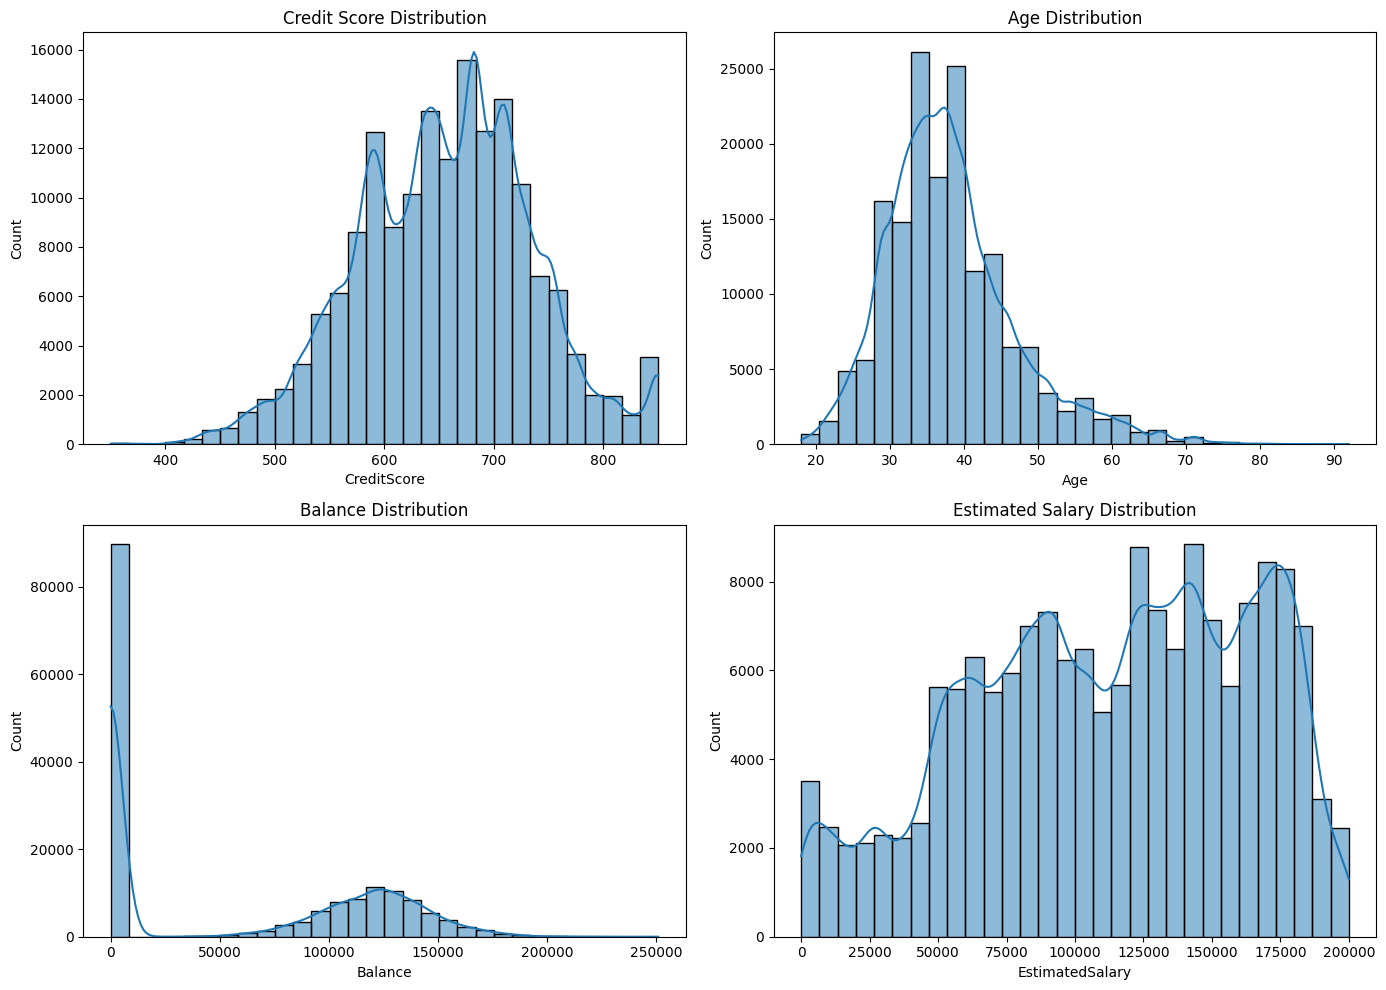

In [11]:
# Plotting continuous variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(train['CreditScore'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Credit Score Distribution')

sns.histplot(train['Age'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

sns.histplot(train['Balance'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

sns.histplot(train['EstimatedSalary'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

***Observation***:
- We have 01 target `Exited` as categorical
- We have 02 ID types variables, which I don't believe would show much of a value: `id` & `CustomerId`
- We have 04 continuous variables with: `CreditScore`, `Age`, `Balance` & `EstimatedSalary`. However, based on my domain expertise, we should try to categorized them into different groups. That would help improve predictability & model interpretability
- We have 04 categorical variables with: `Tenure`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`. Again, we need proper encoding for these items.
- We have 03 text variables: `Surname`, `Geography` & `Gender`. Again, we could encode `Geography` & `Gender`.
- No missing value. That's great

## ***3. Feature Engineering***

***Intro***: 
Feature engineering usually comes from domain expertise, EDA & experience from others.
After consideration, here are some suggestions for feature engineering I'd implement
1. For continuous variables (`CreditScore`, `Age`, `Balance` & `EstimatedSalary`):
- `CreditScore` & `Age` would be categorized into different groups
- `Balance` & `EstimatedSalary` will be scaled
2. For categorical variables: (`Tenure`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`) & 02 text variables (`Geography` & `Gender`), we will encode them. In particular:
- `Tenure` & `NumOfProducts` will remain the same as they're numerical values.
- `HasCrCard` & `IsActiveMember` will also remain the same because binary features (only 0 or 1) doesn't need to be encoded.
- `Geography` & `Gender` are text variables. We'll One-hot encode both of them.
3. `Surename` is an interesting one. According to many discussions on Kaggle, perform TfidfVectorizer & TruncatedSVD brings prediction values. Let's try it.
4. New features creation:
- `IsSenior` to indicate customer with `Age` > 65.
- `ZeroBalance` to idicate customer with `Balance` = 0.
- `IsActive_with_CreditCard` to indicate customer `IsActiveMember` and `HasCrCard`
- `ProductPerTenure` to indicated how many `NumOfProducts`over `Tenure`.

In [12]:
"""
Create function to bin CreditScore & Age into different groups
In particular CreditScore will be binned into 3 groups: Low, Medium, High
Age will be binned into 4 groups: Young, Adult, Middle-aged, Senior 
"""
def bin_credit_score_age(df):
    # Binning CreditScore
    bins_credit = [300, 600, 750, 850]
    labels_credit = ['Low', 'Medium', 'High']
    df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins_credit, labels=labels_credit, include_lowest=True)
    
    # Binning Age
    bins_age = [18, 30, 45, 65, 100]
    labels_age = ['Young', 'Adult', 'Middle-aged', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, include_lowest=True)
    
    return df

bin_credit_score_age_transformer = FunctionTransformer(bin_credit_score_age)



In [13]:
""""Kaggle Playground S04E01 - BankChurn.ipynb"
Create a function to robust scale Balance & EstimatedSalary features
"""
def robust_scale_balance_salary(df):
    scaler = StandardScaler()
    df[['Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Balance', 'EstimatedSalary']])
    return df

robust_scale_transformer = FunctionTransformer(robust_scale_balance_salary)

In [14]:
""""Kaggle Playground S04E01 - BankChurn.ipynb"
Create a function to one-hot encode Geography & Gender features
"""
def one_hot_encode_geography_gender(df):
    df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
    return df

one_hot_encode_transformer = FunctionTransformer(one_hot_encode_geography_gender)

In [15]:
""""Kaggle Playground S04E01 - BankChurn.ipynb"
Perform TfidfVectorizer on Surname feature
Then use TruncatedSVD to reduce the dimensionality of the resulting matrix
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin

class Vectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, max_features=1000, cols=['Surname'], n_components=3, random_state=None):
        self.max_features = max_features
        self.cols = cols
        self.n_components = n_components
        self.random_state = random_state
        self.vectorizer_dict = {}
        self.decomposer_dict = {}
        
    def fit(self, X, y=None):
        for col in self.cols:
            vectorizer = TfidfVectorizer(max_features=self.max_features)
            decomposer = TruncatedSVD(n_components=self.n_components, random_state=self.random_state)
            X_col = X[col].astype(str)
            X_vect = vectorizer.fit_transform(X_col)
            decomposer.fit(X_vect)
            self.vectorizer_dict[col] = vectorizer
            self.decomposer_dict[col] = decomposer
        return self
    
    def transform(self, X):
        vectorized_dfs = []
        for col in self.cols:
            vectorizer = self.vectorizer_dict[col]
            decomposer = self.decomposer_dict[col]
            X_col = X[col].astype(str)
            X_vect = vectorizer.transform(X_col)
            X_decomp = decomposer.transform(X_vect)
            columns = [f'{col}SVD{i}' for i in range(self.n_components)]
            df = pd.DataFrame(X_decomp, columns=columns)
            vectorized_dfs.append(df)
        vectorized_df = pd.concat(vectorized_dfs, axis=1)
        return pd.concat([X.reset_index(drop=True), vectorized_df], axis=1)
    
    # def scale_and_convert_svd_features(df):
    #     svd_columns = [col for col in df.columns if 'SVD' in col]
    #     df[svd_columns] = (df[svd_columns] * 1e18).astype(np.int64)
    #     return df

    # scale_and_convert_svd_transformer = FunctionTransformer(scale_and_convert_svd_features)

In [16]:
""""Kaggle Playground S04E01 - BankChurn.ipynb"
Create a function that creates new features as follow.
- `IsSenior` to indicate customer with `Age` > 65.
- `ZeroBalance` to idicate customer with `Balance` = 0.
- `IsActive_with_CreditCard` to indicate customer `IsActiveMember` and `HasCrCard`
- `ProductPerTenure` to indicated how many `NumOfProducts`over `Tenure`
"""
def create_new_features(df):
    df['IsSenior'] = df['Age'] > 65
    df['ZeroBalance'] = df['Balance'] == 0
    df['IsActive_with_CreditCard'] = (df['IsActiveMember'] == 1) & (df['HasCrCard'] == 1)
    df['ProductPerTenure'] = df['NumOfProducts'] / df['Tenure'].replace(0, np.nan)
    return df

new_features_transformer = FunctionTransformer(create_new_features)

## ***4. Modelling***

***Intro***:
Now that we have done feature engineering, We'd need to start modelling using scikit-learn pipeline & cross-validation

### ***4.1 Prepare cross validation***

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, make_scorer

seed = 42
splits = 30
skf = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True)

def cross_val_score(estimator, X_train, y_train, X_test, cv=skf, label=''):
   
    # Initiate prediction arrays and score lists
    val_predictions = np.zeros(len(X_train))  # Initialize to zeros with the same length as X_train
    train_scores, val_scores = [], []

    test_predictions = np.zeros(len(X_test))

    # Training model, predicting prognosis probability, and evaluating metrics
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        print(f"Fold {fold + 1}")

        model = clone(estimator)

        # Define train and validation sets
        X_train_fold = X_train.iloc[train_idx].reset_index(drop=True)
        y_train_fold = y_train.iloc[train_idx].reset_index(drop=True)
        X_val_fold = X_train.iloc[val_idx].reset_index(drop=True)
        y_val_fold = y_train.iloc[val_idx].reset_index(drop=True)

        # Train model
        model.fit(X_train_fold, y_train_fold)

        # Make predictions
        train_preds = model.predict_proba(X_train_fold)[:, 1]
        val_preds = model.predict_proba(X_val_fold)[:, 1]

        val_predictions[val_idx] += val_preds  # Add predictions to the corresponding indices
        test_predictions += model.predict_proba(X_test)[:, 1] / cv.get_n_splits()

        # Evaluate model for a fold
        train_score = roc_auc_score(y_train_fold, train_preds)
        val_score = roc_auc_score(y_val_fold, val_preds)

        # Append model score for a fold to list
        train_scores.append(train_score)
        val_scores.append(val_score)

    print(f'Val Score: {np.mean(val_scores):.5f} ± {np.std(val_scores):.5f} | Train Score: {np.mean(train_scores):.5f} ± {np.std(train_scores):.5f} | {label}')

    return val_scores, val_predictions, test_predictions